### 회귀 트리
- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정트리, 랜덤 포레스트, GBM, XGBOOST, LIGHTGBM 등 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능한데 트리 생성이 CART(Classification And Regression Trees)에 기반하고 있기 때문이며 CART는 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘임


In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
# 지금 우리는 데이터 전체를 학습하고, 테스트는 별도의 데이터로 할 예정임
X = df.drop('PRICE', axis=1)
y = df.PRICE

In [10]:
# RF 분류기 1000개
rfr = RandomForestRegressor(random_state=0, n_estimators=1000)
nmse = cross_val_score(rfr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1*nmse)
print(f'Negative MSE Score: {np.round(nmse,4)}')
print(f'RMSE Score: {np.round(rmse,4)}')
print(f'평균 RMSE: {rmse.mean():.4f}')

Negative MSE Score: [ -7.8829 -13.1431 -20.5739 -46.2259 -18.8781]
RMSE Score: [2.8076 3.6253 4.5358 6.799  4.3449]
평균 RMSE: 4.4225


In [21]:
# xgboost 써볼까?
def getreg(model, X, y):
    nmse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse = np.sqrt(-1*nmse)
    print(f'#### {model.__class__.__name__}의 검증 결과 ####')
    print(f'Negative MSE Score: {np.round(nmse,4)}')
    print(f'RMSE Score: {np.round(rmse,4)}')
    print(f'평균 RMSE: {rmse.mean():.4f}')

In [24]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

X = df.drop('PRICE', axis=1)
y = df.PRICE

dtr = DecisionTreeRegressor(random_state=0, max_depth=4)
xbgr = XGBRegressor(n_estimators=1000)
lgbmr = LGBMRegressor(n_estimators=1000)

getreg(dtr, X,y)
getreg(xbgr, X,y)
getreg(lgbmr, X,y)

#### DecisionTreeRegressor의 검증 결과 ####
Negative MSE Score: [-11.9421 -36.2533 -29.6341 -47.226  -65.5637]
RMSE Score: [3.4557 6.0211 5.4437 6.8721 8.0971]
평균 RMSE: 5.9780
#### XGBRegressor의 검증 결과 ####
Negative MSE Score: [ -9.168  -13.7428 -13.9485 -41.7612 -18.6913]
RMSE Score: [3.0279 3.7071 3.7348 6.4623 4.3233]
평균 RMSE: 4.2511
#### LGBMRegressor의 검증 결과 ####
Negative MSE Score: [ -8.9591 -18.5774 -17.0537 -43.7083 -26.9157]
RMSE Score: [2.9932 4.3102 4.1296 6.6112 5.188 ]
평균 RMSE: 4.6464


,value
RM,0.426606
LSTAT,0.377535
DIS,0.065787
CRIM,0.039371
NOX,0.023018
PTRATIO,0.017132
TAX,0.014702
AGE,0.012944
B,0.011359
INDUS,0.005688


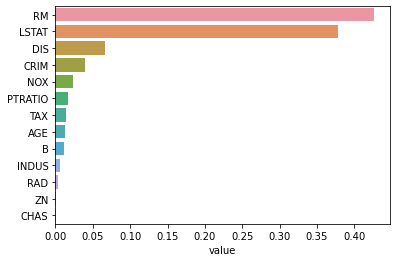

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
rfr = RandomForestRegressor(random_state=0, n_estimators=1000)
rfr.fit(X,y)
imp = pd.DataFrame(rfr.feature_importances_, index = X.columns,
                   columns=['value']).sort_values(by='value', ascending=False)
display(imp)
sns.barplot(x=imp.value, y = imp.index)
plt.show()

(100, 2)


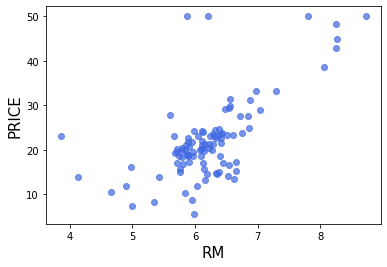

In [38]:
bdf = df[['RM','PRICE']]
bdf_sample = bdf.sample(n=100, random_state=0)
print(bdf_sample.shape)
plt.scatter(bdf_sample.RM, bdf_sample.PRICE, color='royalblue', alpha=0.7)
plt.xlabel('RM', fontsize=15)
plt.ylabel('PRICE', fontsize=15)
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
dt2 = DecisionTreeRegressor(max_depth=2)
dt7 = DecisionTreeRegressor(max_depth=7)

# 별도의 테스트 데이터 생성 - 이건 RM값을 의미
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

In [48]:
# 독립변수 RM, 종속변수 PRICE
X_train = bdf_sample.RM.values.reshape(-1,1)
y_train = bdf_sample.PRICE.values.reshape(-1,1)

In [49]:
# 학습 및 예측
lr.fit(X_train, y_train)
dt2.fit(X_train, y_train)
dt7.fit(X_train, y_train)

p1 = lr.predict(X_test)
p2 = dt2.predict(X_test)
p3 = dt7.predict(X_test)

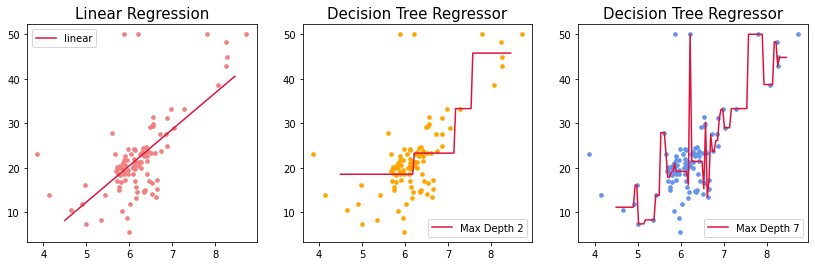

In [64]:
# 각각의 경우에 대한 산점도와 회귀선 출력
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regression', fontsize=15)
ax1.scatter(bdf_sample.RM, bdf_sample.PRICE, c='lightcoral', s=13)
ax1.plot(X_test, p1, label='linear', c='crimson')

ax2.set_title('Decision Tree Regressor', fontsize=15)
ax2.scatter(bdf_sample.RM, bdf_sample.PRICE, c='orange', s=13)
ax2.plot(X_test, p2, label='Max Depth 2', c='crimson')

ax3.set_title('Decision Tree Regressor', fontsize=15)
ax3.scatter(bdf_sample.RM, bdf_sample.PRICE, c='cornflowerblue', s=13)
ax3.plot(X_test, p3, label='Max Depth 7', c='crimson')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

# 트리의 깊이가 깊어질수록 확실히 과대적합의 가능성이 증가한다.